In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

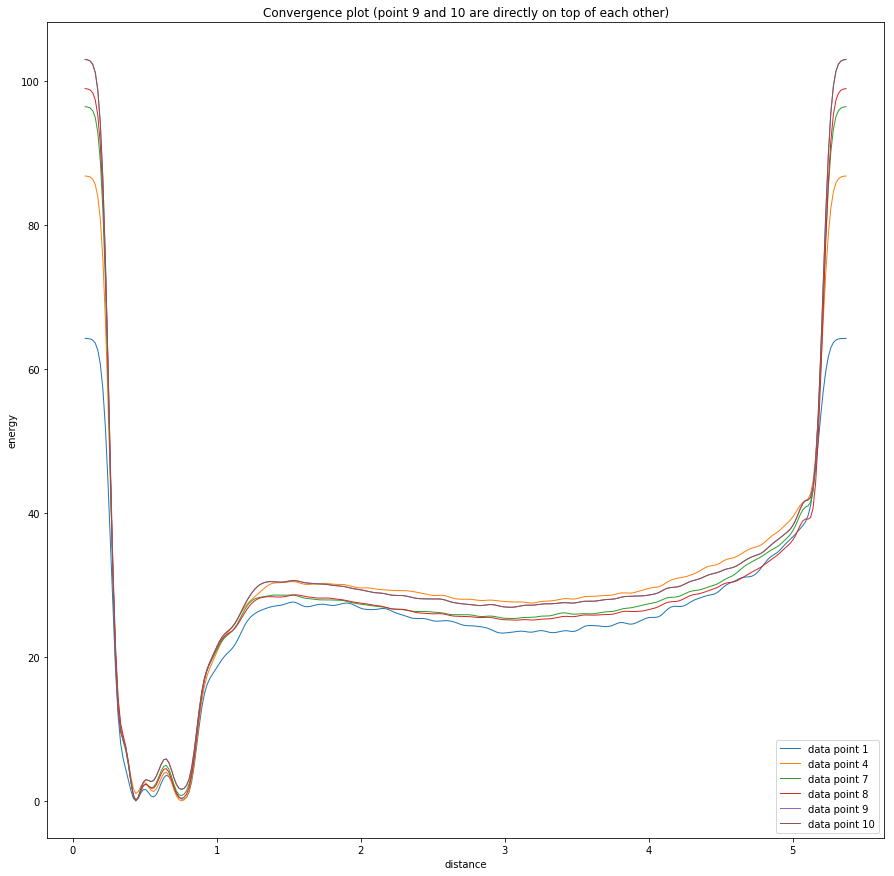

In [8]:
my_list=[1,4,7,8,9,10]   #plots for convergence
data=dict()              #So I can iterate variable names
plt.figure(figsize=(15,15)) #to plot obviously
for i in my_list:
    data[i]=pd.read_csv('files/fes1_'+str(i)+'.dat',skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    plt.plot(data[i]['distance'],data[i]['energy'], lw=1)

plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Convergence plot (point 9 and 10 are directly on top of each other)')
plt.legend(['data point 1','data point 4','data point 7','data point 8','data point 9','data point 10'])
plt.show()

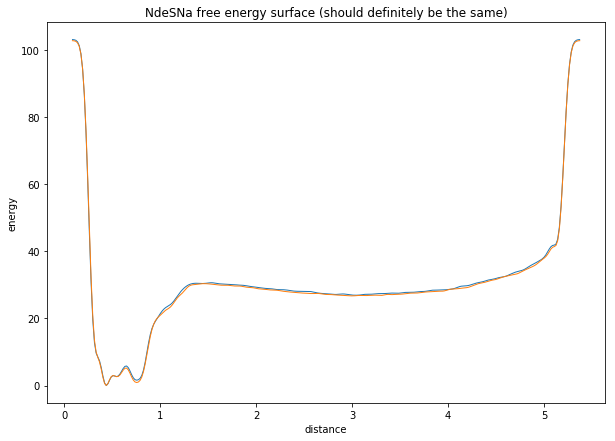

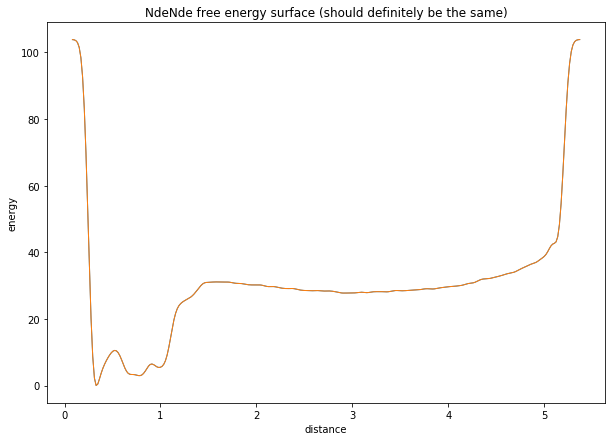

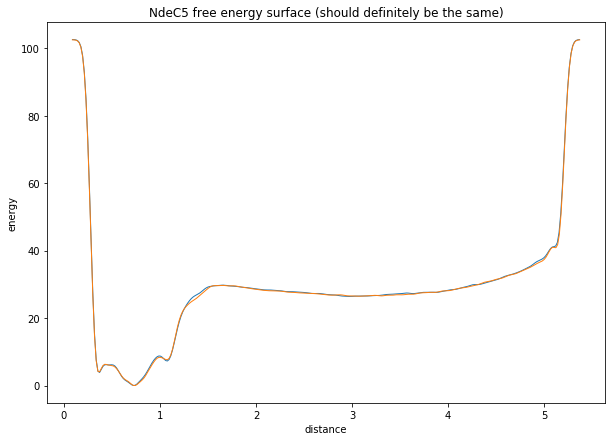

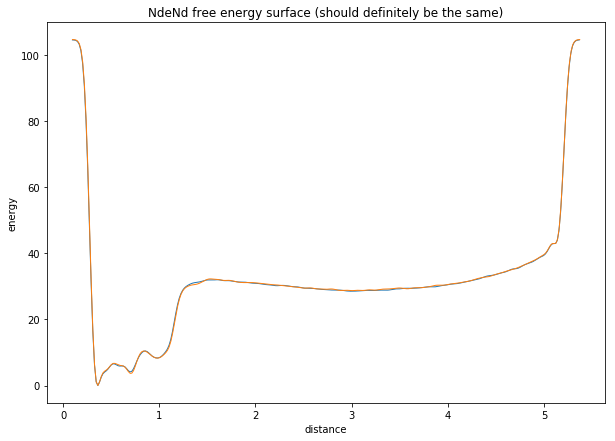

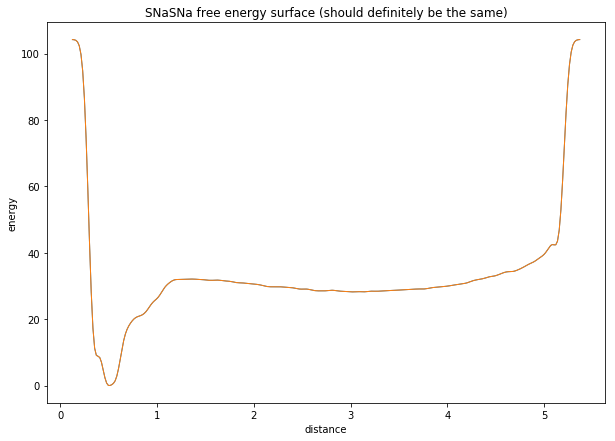

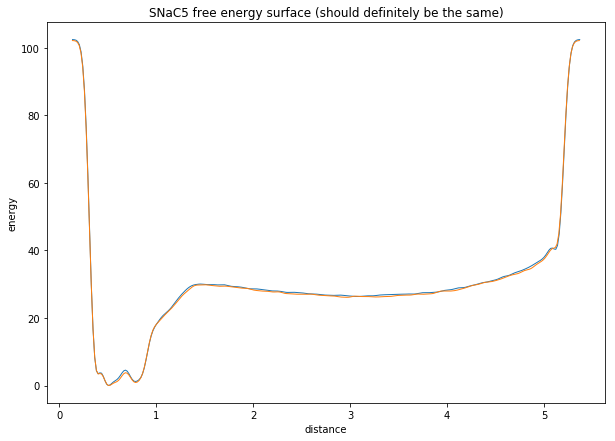

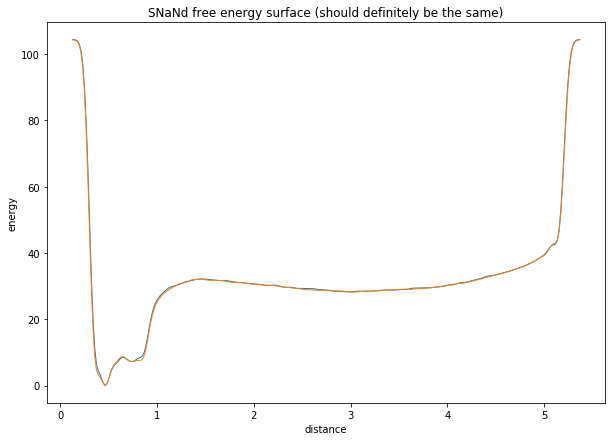

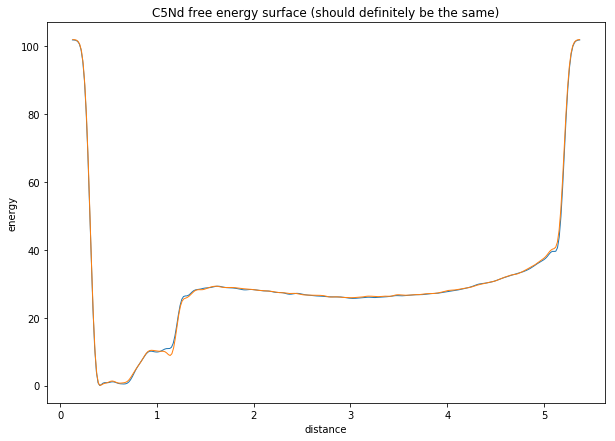

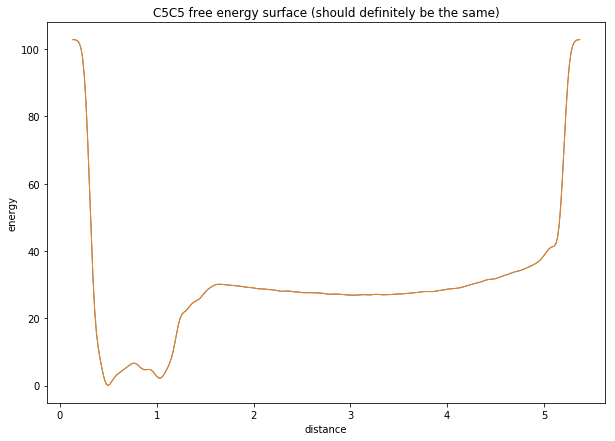

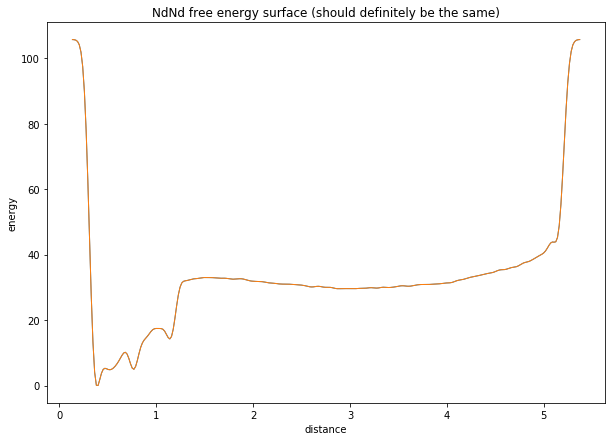

In [4]:
listofinteractions=['NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd']
for i in range(1,11):
    filename1='files/fes'+str(i)+'.dat'
    filename2='files/fes'+str(i+10)+'.dat'
    data1=pd.read_csv(filename1,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    data2=pd.read_csv(filename2,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)

    plt.figure(figsize=(10,7))
    plt.plot(data1['distance'],data1['energy'],data2['distance'],data2['energy'], lw=1)
    plt.xlabel('distance')
    plt.ylabel('energy')
    plt.title(listofinteractions[i-1]+' free energy surface (should definitely be the same)')
    plt.show()

In [11]:
data1.tail()

,distance,energy,error
293,5.300171,104.062260,79.522503
294,5.317801,105.038298,35.488933
295,5.335431,105.452474,13.755277
296,5.353060,105.605602,4.638830
297,5.370690,105.658442,1.079595


In [6]:
data2.head()

,distance,energy,error
0,0.134670,105.659365,-1.052862
1,0.152300,105.616015,-4.090124
2,0.169929,105.476843,-12.868323
3,0.187559,105.080232,-35.108248
4,0.205189,104.078349,-84.275980


In [44]:
f=interp1d(data1['distance'],data1['energy'],kind='cubic',fill_value='extrapolate')
print(f)

In [45]:
xnew=np.arange(data1['distance'].min(),data1['distance'].max(),0.002)

In [46]:
ynew=f(xnew)
print(ynew)
print(xnew)

[ 105.65936525  105.65525158  105.65135312 ...,  105.64824311  105.65319651
  105.6583886 ]
[ 0.13467  0.13667  0.13867 ...,  5.36667  5.36867  5.37067]


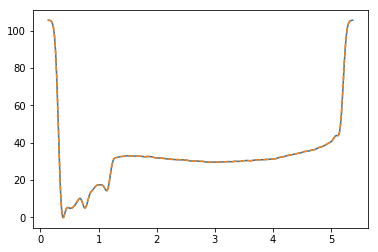

In [47]:
plt.plot(data1['distance'],data1['energy'],xnew,ynew,'--')
plt.show()

In [49]:
xnew=np.arange(0,5.5,0.002)
ynew=f(xnew)

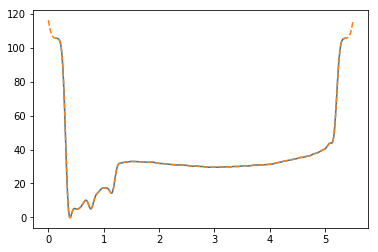

In [50]:
plt.plot(data1['distance'],data1['energy'],xnew,ynew,'--')
plt.show()

In [51]:
len(ynew)

2750